# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 7967 files belonging to 3 classes.
['class1', 'class2', 'class3']


# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_model2.keras')

#Visualising and Performing Prediction on Single image

Checking if file exists: True
Current working directory: C:\KJSCE\projects\plant project
Files in 'test/class1/Blueberry___healthy': ['.ipynb_checkpoints', '00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681_flipTB.JPG', '00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681_newPixel25.JPG', '011405e4-a92a-44b6-9f04-10fec28d93f5___RS_HL 2311.JPG', '0137389a-9b78-4a94-afdb-c2b50861f89c___RS_HL 2347.JPG', '013ffdc5-cbd1-4202-b0f1-8fd7c1ffc0b8___RS_HL 5120.JPG', '01ca7a9f-80a6-4693-a067-50684beda81d___RS_HL 2545.JPG', '01ca7a9f-80a6-4693-a067-50684beda81d___RS_HL 2545_180deg.JPG', '01ca7a9f-80a6-4693-a067-50684beda81d___RS_HL 2545_flipTB.JPG', '01ca7a9f-80a6-4693-a067-50684beda81d___RS_HL 2545_new30degFlipLR.JPG', '01ca7a9f-80a6-4693-a067-50684beda81d___RS_HL 2545_newPixel25.JPG', '02159532-6430-4006-a245-421593949304___RS_HL 2686.JPG', '021e662c-f3a0-4e08-a2cf-346748f95475___RS_HL 0344.JPG', '022c53af-7964-4692-8dee-04a563d352bf___RS_HL 2317.JPG', '0293e23d-2961-4271-9a6c-1a568d942887___RS_HL

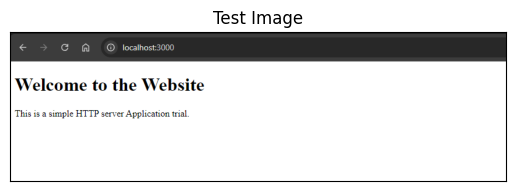

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

# Relative path to the image
image_path = 'test/class2/12.PNG'

# Check if file exists
print(f"Checking if file exists: {os.path.exists(image_path)}")

# Show current working directory
print(f"Current working directory: {os.getcwd()}")

# Optional: list files in the target directory (helps in debugging)
folder_path = 'test/class1/Blueberry___healthy'
if os.path.exists(folder_path):
    print(f"Files in '{folder_path}': {os.listdir(folder_path)}")
else:
    print(f"Directory '{folder_path}' does not exist.")

# Load and display the image
img = cv2.imread(image_path)
if img is None:
    print("❌ Error: Could not read image. Check the path and filename.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()


## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 6s 6s/step


In [6]:
print(predictions)

[[0.0000000e+00 1.0000000e+00 1.7084991e-35]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


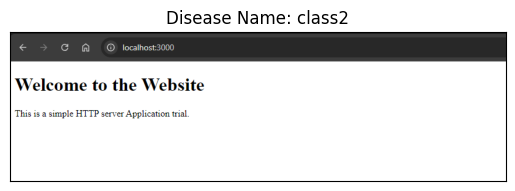

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()